In [1]:
from branching_sus.implementation import ConvexGraphBranching
from branching_sus.performance_function import breitung
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
colors = [
    '#e66101',
    '#fdb863',
    '#b2abd2',
    '#5e3c99'
]

In [ ]:
bss = ConvexGraphBranching(performance_function=breitung,
                           dimension=2,
                           level_size=500,
                           threshold=0,
                           level_probability=0.1,
                           seed=3,
                           params=None,
                           convex_budget=100,
                           verbose=False)

bss.run()

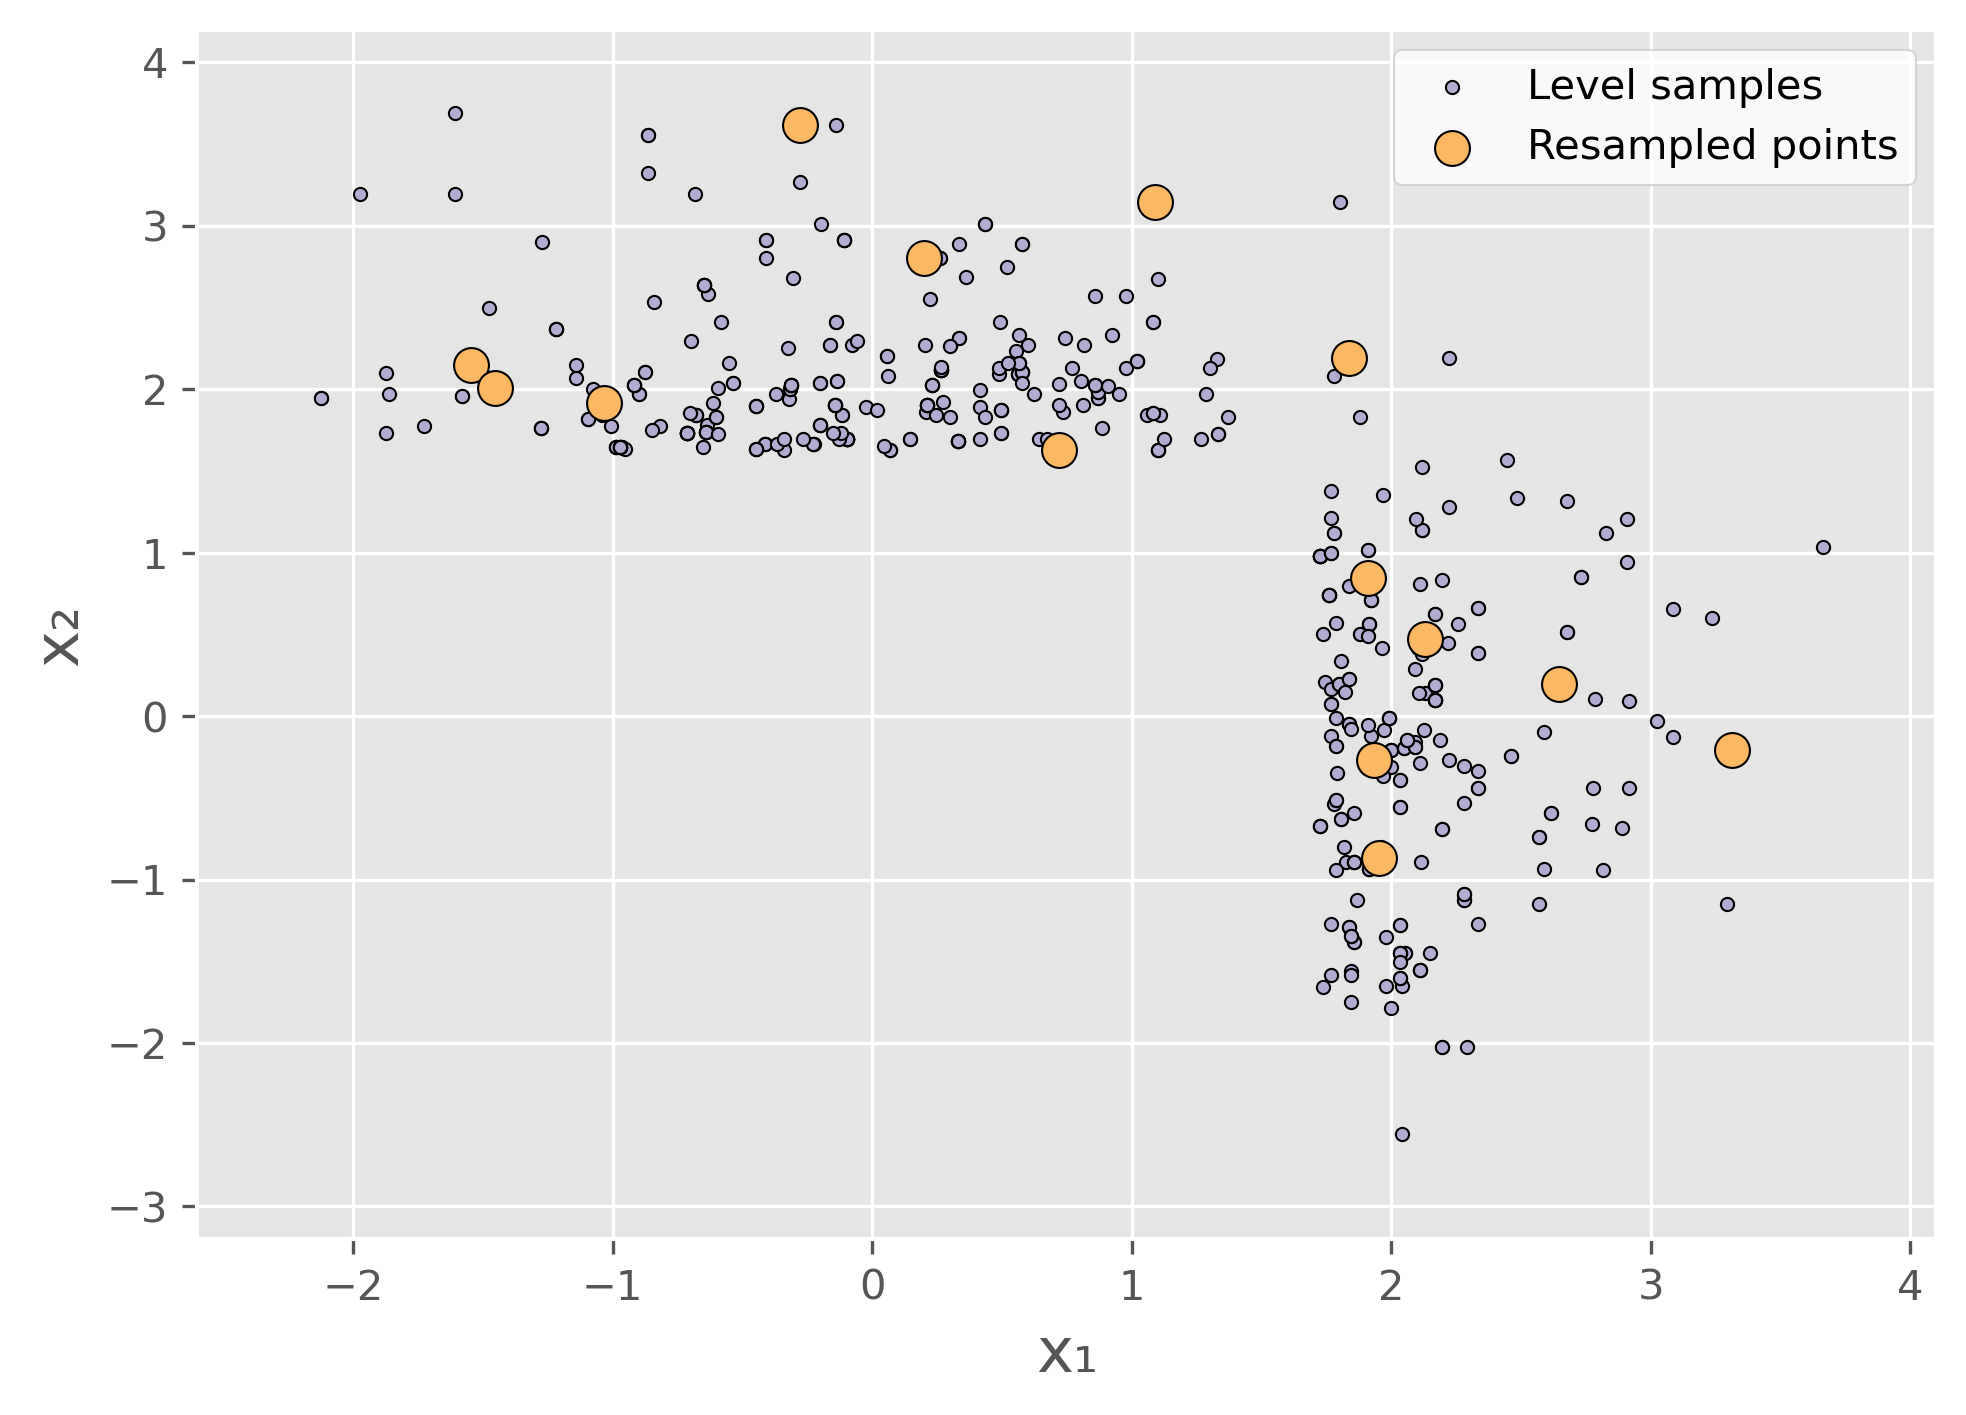

In [4]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)


level = bss.find('2')
level_array = np.array([samp.array for samp in level.sample_list])
plotter = level_array.T
plt.scatter(plotter[0],plotter[1],
            s=10,label = 'Level samples', color=colors[2], edgecolor='black')

info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
plt.scatter(plotter[0],plotter[1],s=70, color=colors[1], label = 'Resampled points',edgecolor='black')

plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

plt.legend(fontsize=10,frameon=True,facecolor='white',loc='upper right')

plt.savefig('resampled_points.pdf',bbox_inches='tight')

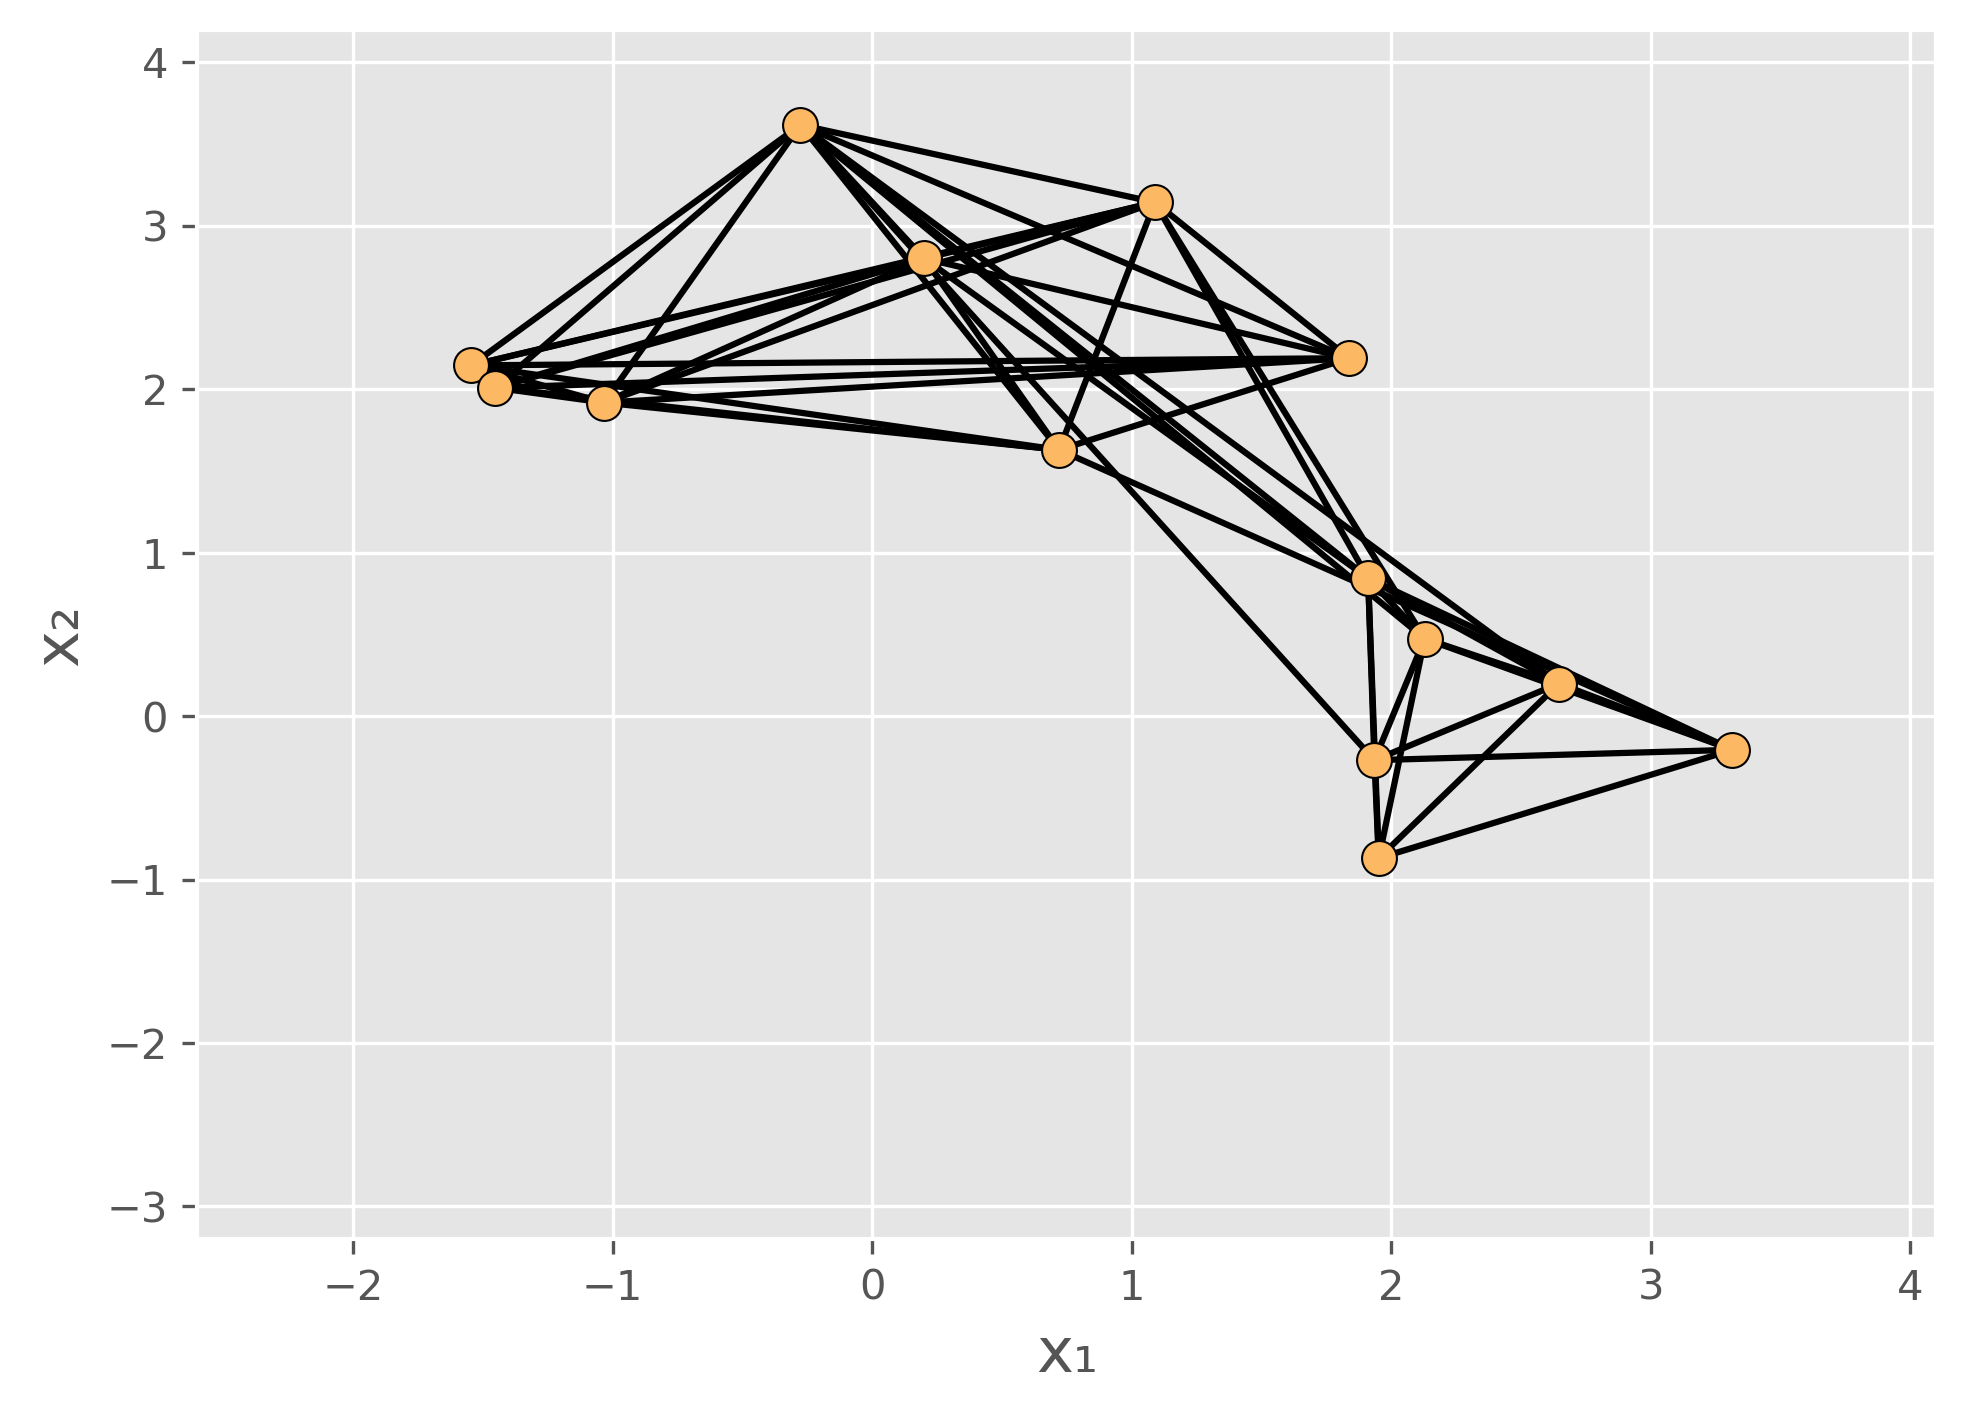

In [5]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)


info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
graph = info.graph
adj = nx.adjacency_matrix(graph)


for i in range(len(plotter.T)):
    for j in range(i + 1, len(plotter.T)):
        if adj[i, j] == 1:
            plt.plot([plotter.T[i, 0],plotter.T[j, 0]], [plotter.T[i, 1], plotter.T[j, 1]], color='black',zorder=1)
            
plt.scatter(plotter[0],plotter[1],s=70, color=colors[1], label = 'Resampled points',edgecolor='black')


plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

plt.savefig('convex_graph.pdf',bbox_inches='tight')

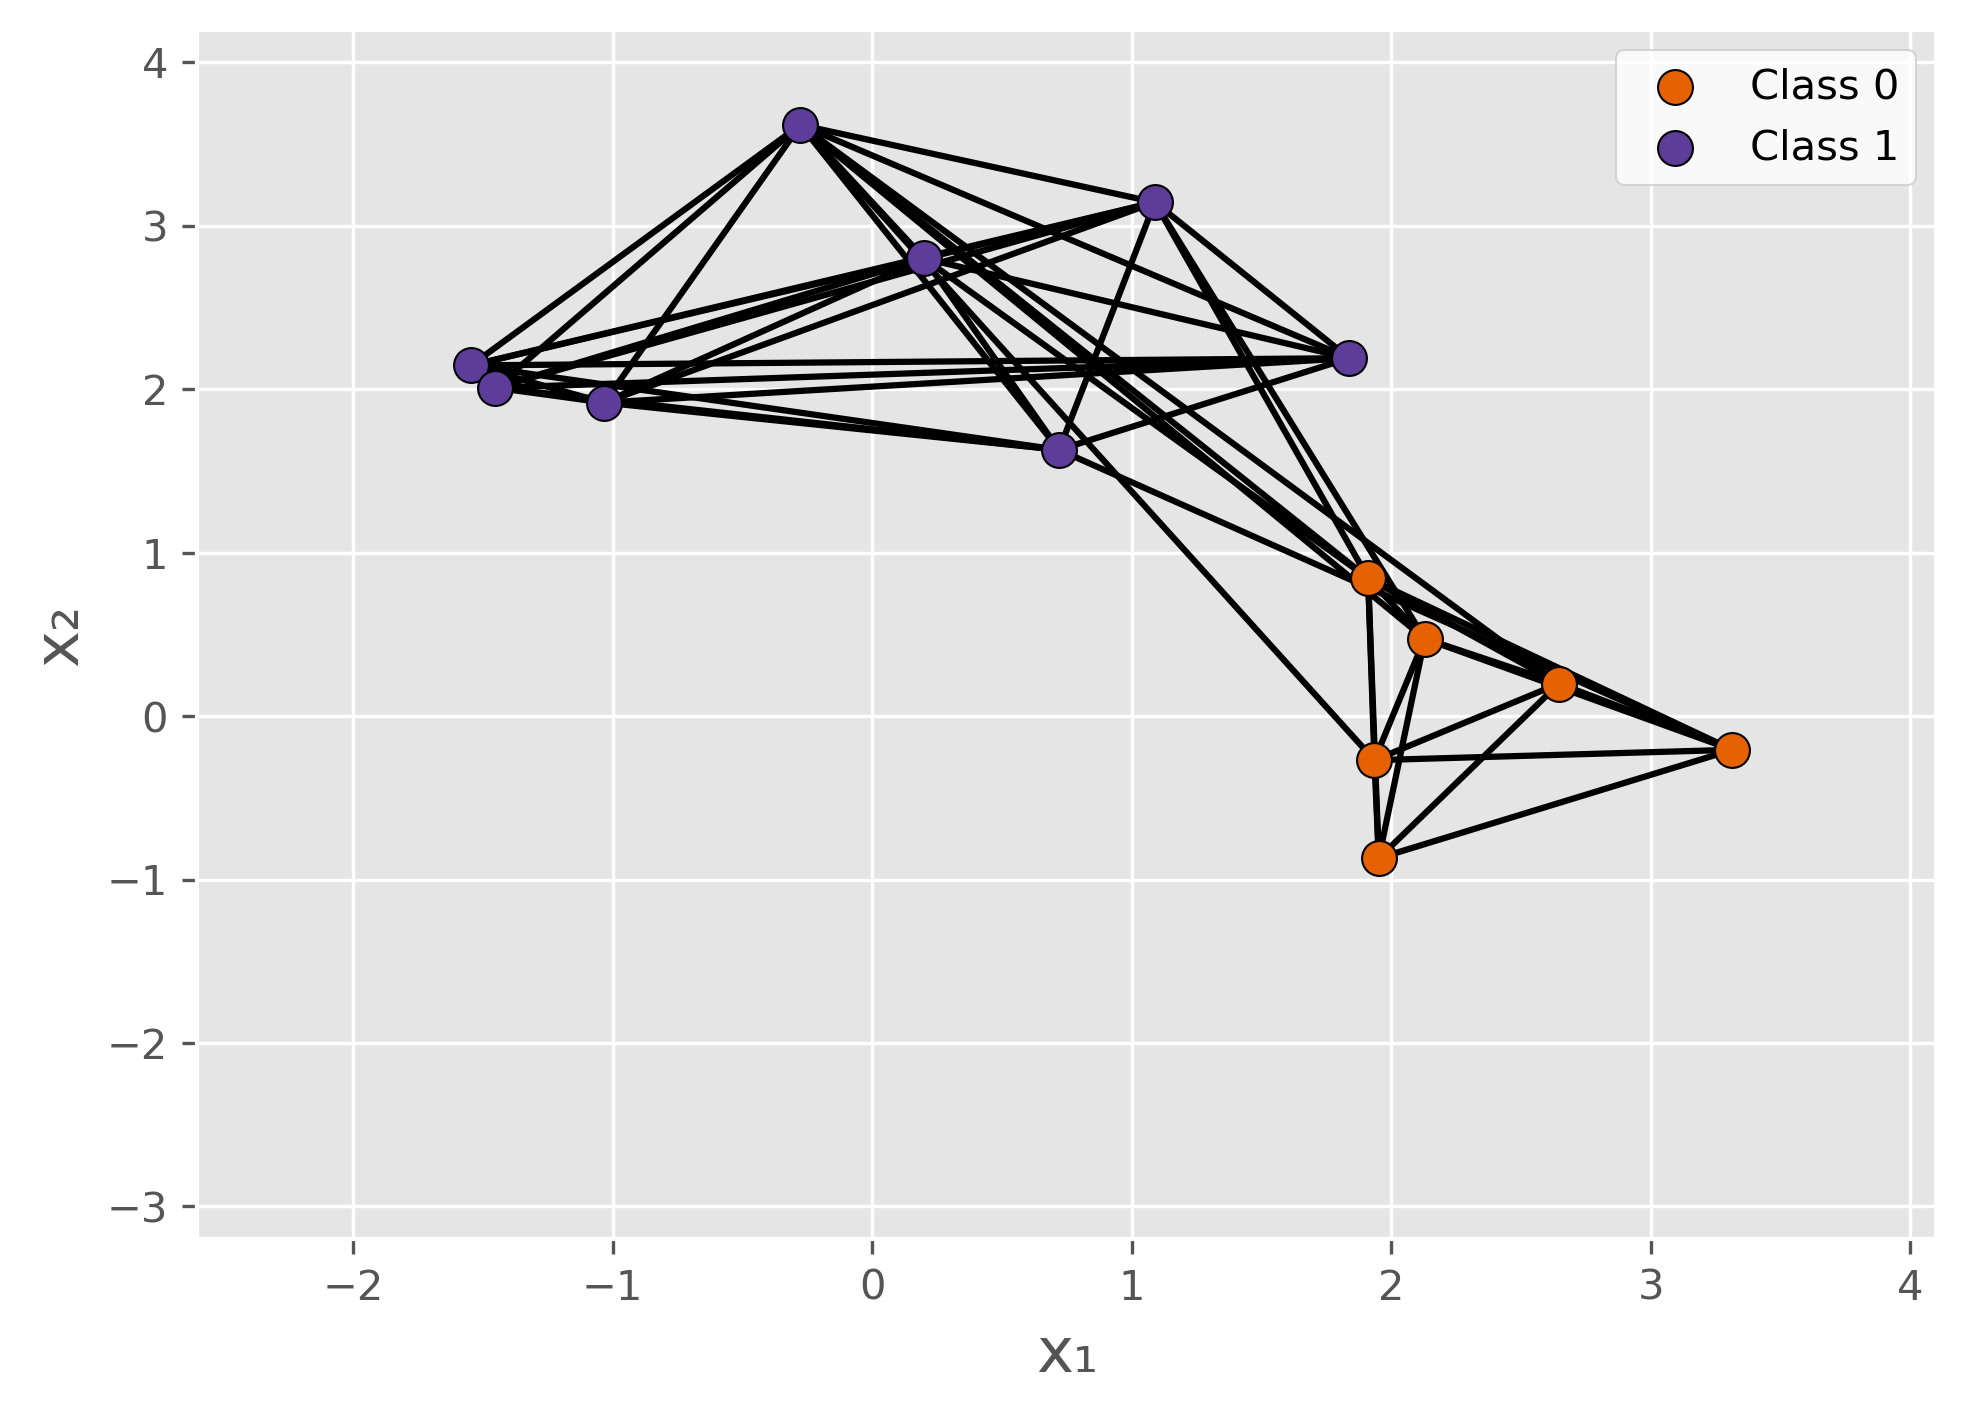

In [6]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)


sample_partition = info.sample_partition

info = bss.partitioner.get_partition_information_for_level(level)
graph_samples = info.graph_samples
plotter = np.array([samp.array for samp in graph_samples]).T
graph = info.graph
adj = nx.adjacency_matrix(graph)


for i in range(len(plotter.T)):
    for j in range(i + 1, len(plotter.T)):
        if adj[i, j] == 1:
            plt.plot([plotter.T[i, 0],plotter.T[j, 0]], [plotter.T[i, 1], plotter.T[j, 1]], color='black',zorder=1)
            
            
for part_set,c,label in zip(sample_partition,[colors[0],colors[3]],['Class 0','Class 1']):
    plotter = np.array([samp.array for samp in part_set]).T
    plt.scatter(plotter[0],plotter[1],s=70,zorder=2,color=c,label=label,edgecolor='black')
    

    
plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)


plt.legend(fontsize=10,frameon=True,facecolor='white')

plt.savefig('community_detection.pdf',bbox_inches='tight')

In [7]:
def contour_plot(x_range, y_range, step, function, levels=None):
    x = np.arange(x_range[0], x_range[1], step)
    y = np.arange(y_range[0], y_range[1], step)
    xx, yy = np.meshgrid(x, y)
    flat = np.vstack([xx.ravel(), yy.ravel()])
    z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
    plt.contour(xx, yy, z, levels=levels,colors='black')

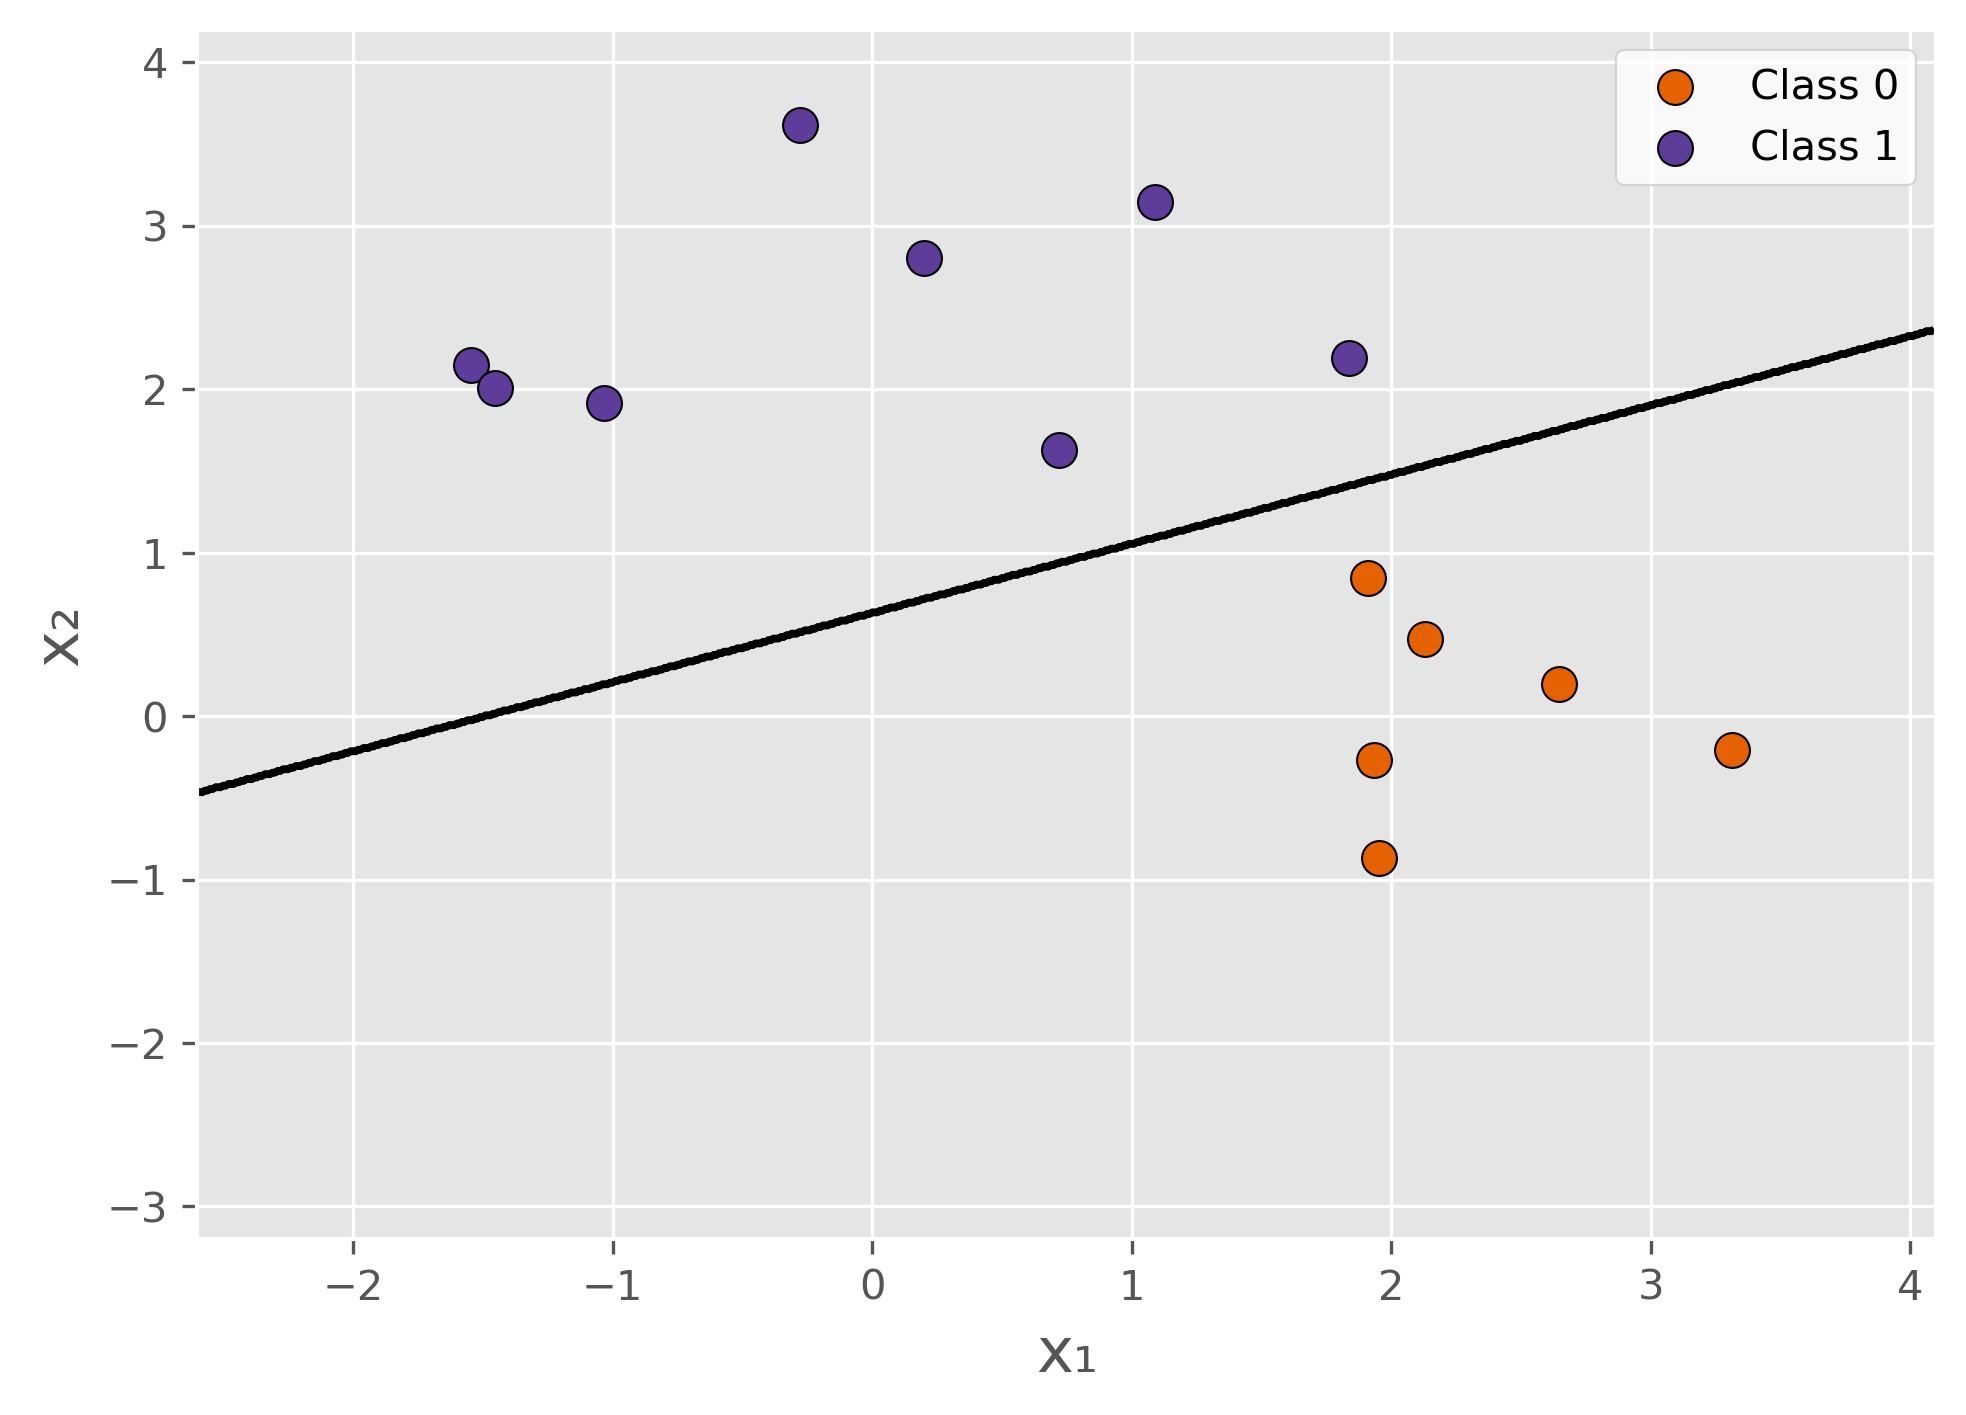

In [8]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

classifier = info.classifier
for part_set,c,label in zip(sample_partition,[colors[0],colors[3]],['Class 0','Class 1']):
    plotter = np.array([samp.array for samp in part_set]).T
    plt.scatter(plotter[0],plotter[1],s=70,zorder=2,color=c,label=label,edgecolor='black')
    
    
contour_plot((-2.6,4.1), (-3.2,4.2), 0.01, classifier, levels=None)

plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

plt.legend(fontsize=10,frameon=True,facecolor='white')

plt.savefig('classifier.pdf',bbox_inches='tight')

In [ ]:
plt.style.use('ggplot')
cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)


level = bss.find('2')
level_array = np.array([samp.array for samp in level.sample_list])
plotter = level_array.T
plt.scatter(plotter[0],plotter[1],
            s=10,  color=colors[2], edgecolor='black')


contour_plot((-2.6,4.1), (-3.2,4.2), 0.01, classifier, levels=None)

plt.xlim(-2.6,4.1)
plt.ylim(-3.2,4.2)

plt.xlabel(u'x\u2081',fontsize=15)
plt.ylabel(u'x\u2082',fontsize=15)

plt.savefig('partition_result.pdf',bbox_inches='tight')